In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [ ]:
x, _ = make_blobs(n_samples=100,
                  centers=3,
                  cluster_std=2,
                  random_state=42)

In [ ]:
def divisine_clustering(data,
                        max_clusters=4):
    clusters = [data]
    labels = np.zeros(len(data), dtype=int)
    while len(clusters) < max_clusters:
        idx_to_split = np.argmax([len(c) for c in clusters])
        clusters_to_split = clusters.pop(idx_to_split)
        current_label = np.max(labels) + 1
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(clusters_to_split)
        cluster1 = clusters_to_split[split_labels == 0]
        cluster2 = clusters_to_split[split_labels == 1]
        clusters.append(cluster1)
        clusters.append(cluster2)
        label_indices = np.where([np.any(np.all(x == clusters_to_split,
                                          axis=1)) for x in data])[0]
        label_subset = split_labels
        labels[label_indices] = current_label
        labels[label_indices[split_labels == 0]] = current_label
        labels[label_indices[split_labels == 1]] = current_label +1

    return labels


        
        
        

In [21]:
cluster_labels = divisine_clustering(x,
                                      max_clusters=4)

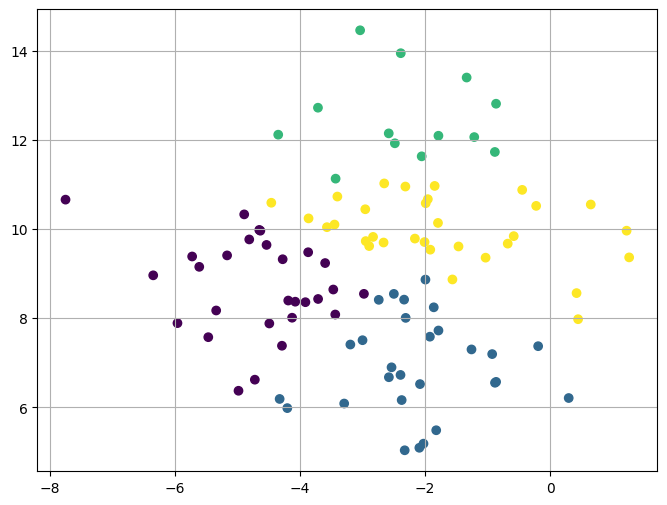

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels)
plt.grid(True)
plt.show()
